# HW-8 ANN
Wyatt Blair

SID: 10420296

2/26/24


## 8.1

Use the ANN methodology with five (5) nodes in the hidden layer, to develop a classification model for the diagnosis.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm.auto import tqdm
from sklearn.metrics import confusion_matrix, f1_score
import seaborn as sns

tqdm.pandas()

In [2]:
dataset = pd.read_csv('../data/wisc_bc_ContinuousVar.csv', index_col='id')
dataset['diagnosis'].replace(["M", "B"], [1, 0], inplace=True)

dataset

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
926424,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
926682,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
926954,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820


In [3]:
def min_max_normalization(series):

    minimum, maximum = series.min(), series.max()
    normalized_data = (series - minimum) / (maximum - minimum)

    return normalized_data

def z_score_standardization(series):

    mean, std = series.mean(), series.std()
    normalized_data = (series - mean) / std

    return normalized_data

In [4]:
target = 'diagnosis'
features = dataset.columns.to_list(); features.remove(target)

In [5]:
normalized_dataset = dataset.copy()
normalized_dataset[features] = min_max_normalization(normalized_dataset[features])

normalized_dataset

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
842302,1,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,...,0.620776,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864
842517,1,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,...,0.606901,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878
84300903,1,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,...,0.556386,0.360075,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433
84348301,1,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,...,0.248310,0.385928,0.241347,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711
84358402,1,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,...,0.519744,0.123934,0.506948,0.341575,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
926424,1,0.690000,0.428813,0.678668,0.566490,0.526948,0.296055,0.571462,0.690358,0.336364,...,0.623266,0.383262,0.576174,0.452664,0.461137,0.178527,0.328035,0.761512,0.097575,0.105667
926682,1,0.622320,0.626987,0.604036,0.474019,0.407782,0.257714,0.337395,0.486630,0.349495,...,0.560655,0.699094,0.520892,0.379915,0.300007,0.159997,0.256789,0.559450,0.198502,0.074315
926954,1,0.455251,0.621238,0.445788,0.303118,0.288165,0.254340,0.216753,0.263519,0.267677,...,0.393099,0.589019,0.379949,0.230731,0.282177,0.273705,0.271805,0.487285,0.128721,0.151909


In [6]:
train = normalized_dataset.sample(frac=0.8)
test = normalized_dataset.drop(index=train.index)

___

In [7]:
def sigmoid(x):

    return (1 + np.exp(-x))**(-1)

def sigmoid_derivative(x):

    return sigmoid(x)*(1 - sigmoid(x))

In [8]:
class ArtificialNeuralNetwork:

    def __init__(self, data, target, num_hidden_neurons, learning_rate, num_epochs, verbose):

        self.num_hidden_neurons = num_hidden_neurons
        self.num_epochs = num_epochs
        self.learning_rate = learning_rate
        self.verbose = verbose
        self.loss_log = {}

        self.data = data
        self.N, self.M = self.data.shape

        self.target = target
        self.features = self.data.columns.to_list()
        self.features.remove(self.target)

        self.X = self.data[features]
        self.y = self.data[target]

        self.w_input_to_hidden = np.random.random((len(self.features), self.num_hidden_neurons)) 
        self.b_input_to_hidden = np.zeros((1, num_hidden_neurons))

        self.w_hidden_to_output = np.random.random((self.num_hidden_neurons, 1)) 
        self.b_hidden_to_output = np.zeros((1, 1))

    def __str__(self):

        s = ''
        s += 'MODEL:\n\n'
        
        s += '=' * 30
        s += '\n--> w_input_to_hidden:\n' + str(self.w_input_to_hidden.flatten()) + '\n'
        s += '=' * 30
        s += '\n--> b_input_to_hidden: ' + str(self.b_input_to_hidden.flatten()) + '\n'
        s += '=' * 30
        s += '\n--> w_hidden_to_output: ' + str(self.w_hidden_to_output.flatten()) + '\n'
        s += '=' * 30
        s += '\n--> b_hidden_to_output: ' + str(self.b_hidden_to_output.flatten()) + '\n'

        return s

    def predict(self, X):

        y_pred_raw = self.forward(X)
        y_pred = (y_pred_raw > 0.5).astype(int)

        return y_pred

    def step(self, X, epoch=-1):

        # Forward and Backward Passes
        y_pred = self.forward(X)
        self.backward(y_pred)

        # Update Weights using knowledge from backwards pass
        self.update_weights()

        # Keep track of the loss
        self.loss_log.update({
            epoch: self.loss(y_pred)
        })

    def loss(self, y_pred):
        
        return np.mean((self.y.values[:, np.newaxis] - y_pred) ** 2)

    def forward(self, X):

        self.hidden = np.dot(X, self.w_input_to_hidden) + self.b_input_to_hidden
        self.sig_hidden = sigmoid(self.hidden)
        self.out = np.dot(self.sig_hidden, self.w_hidden_to_output) + self.b_hidden_to_output
        self.sig_out = sigmoid(self.out)

        return self.sig_out
    
    def backward(self, y_pred):

        self.out_loss = self.y.values[:, np.newaxis] - y_pred

        self.delta_w_hidden_to_output = np.dot(self.hidden.T, self.out_loss)
        self.delta_b_hidden_to_output = np.sum(self.out_loss) 
        
        self.hidden_loss = np.dot(self.out_loss, self.w_hidden_to_output.T) * sigmoid_derivative(self.hidden)

        self.delta_w_input_to_hidden = np.dot(self.X.T, self.hidden_loss)
        self.delta_b_input_to_hidden = np.sum(self.hidden_loss, axis=0)

    def update_weights(self):

        self.w_input_to_hidden += self.delta_w_input_to_hidden * self.learning_rate / self.N
        self.b_input_to_hidden += self.delta_b_input_to_hidden * self.learning_rate / self.N

        self.w_hidden_to_output += self.delta_w_hidden_to_output * self.learning_rate / self.N
        self.b_hidden_to_output += self.delta_b_hidden_to_output * self.learning_rate / self.N

    def fit(self):

        train_loop = range(self.num_epochs)
        if self.verbose: train_loop = tqdm(train_loop, total=self.num_epochs, desc='Training')

        for epoch in train_loop: self.step(X=self.X, epoch=epoch)

        

In [9]:
ann = ArtificialNeuralNetwork(
    data=train,
    target=target,
    num_hidden_neurons=5,
    learning_rate=0.01,
    num_epochs=int(1e4),
    verbose=True
)

In [10]:
ann.fit()

Training:   0%|          | 0/100000 [00:00<?, ?it/s]

In [11]:
test['prediction'] = ann.predict(test[features])
test['correct'] = test['prediction'] == test[target]
acc = test['correct'].value_counts()[True] / len(test.index)

print('Accuracy: %1.3f%%' % (acc*100))

Accuracy: 96.491%


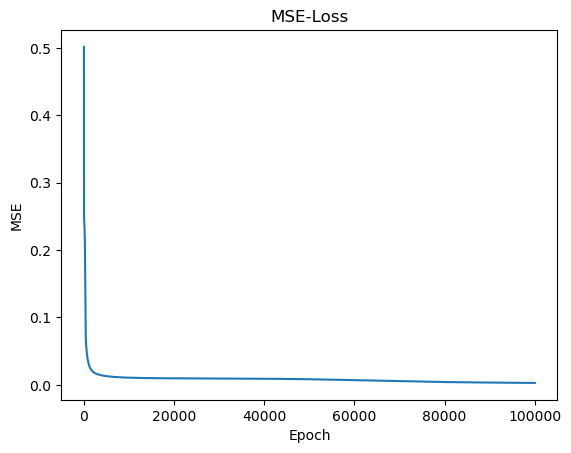

In [12]:
plt.plot(ann.loss_log.keys(), ann.loss_log.values())

plt.title('MSE-Loss')
plt.xlabel('Epoch')
plt.ylabel('MSE')

plt.show()

In [13]:
print(ann)

MODEL:

--> w_input_to_hidden:
[ 0.57702727  0.21880352  0.04332652 -1.65099421  1.18788177  2.09767441
  0.31810861  0.58913893  0.75637226  0.13359588  0.97703663  0.27937051
  0.16919489 -1.45002357  1.0516289   1.22390514  1.10383502  0.20377938
 -1.11222138  0.50903359 -1.27780008  0.47700376 -0.59262071  0.01614327
  0.19882843  0.31070945  0.37783241 -0.80355047 -4.01070242  0.55880248
  2.3212009   0.77825184  1.83005496  2.67794356  0.48615297  2.64738587
  0.91899135  1.64487657  2.81489419  0.31363953 -0.3060072  -0.04217899
 -0.16124993 -0.43990786  0.05992428 -2.69389664  0.10197693 -0.86208183
  1.42488191  0.38483555  1.72255506  0.63078742  1.44753697  5.57064997
  0.67521339 -1.6914779  -0.10878028 -0.49291527  0.4823648   0.14492035
  0.58413226  0.04653507  0.89186299  1.83968841  0.45882351  2.31843634
  0.0510694   1.28850033  3.46622238 -0.02634601  1.85318197  0.68408621
  0.86221793 -2.44032742  0.83544205  0.1817337   0.3245737   0.44578113
 -5.54389988  0.9259

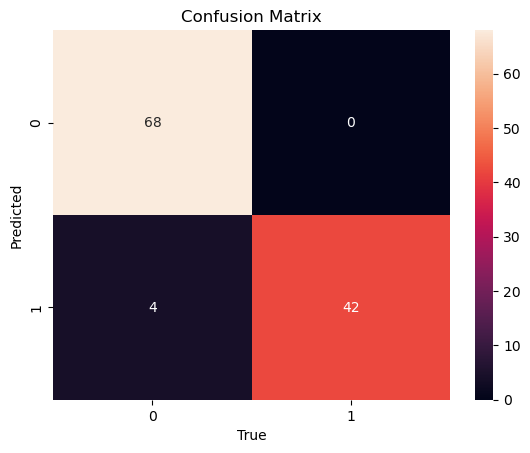

In [14]:
sns.heatmap(confusion_matrix(y_true=test[target], y_pred=test['prediction']), annot=True)

plt.xlabel('True')
plt.ylabel('Predicted')
plt.title('Confusion Matrix')

plt.show()

In [15]:
print('F1-Score: %1.5f' % f1_score(test[target], test['prediction']))

F1-Score: 0.95455
